### 필요 함수

In [7]:

# 문장을 인덱스 리스트로 변환 (encode)
def get_encoded_sentence(sentence, word_to_index):
    return [word_to_index['<BOS>']]+[word_to_index[word] if word in word_to_index else word_to_index['<UNK>'] for word in sentence.split()]

def get_encoded_sentences(sentences, word_to_index):
    return [get_encoded_sentence(sentence, word_to_index) for sentence in sentences]

# 인덱스 리스트를 문장으로 변환 (decode)
def get_decoded_sentence(encoded_sentence, index_to_word):
    return ' '.join(index_to_word[index] if index in index_to_word else '<UNK>' for index in encoded_sentence[1:])  #[1:]를 통해 <BOS>를 제외

def get_decoded_sentences(encoded_sentences, index_to_word):
    return [get_decoded_sentence(encoded_sentence, index_to_word) for encoded_sentence in encoded_sentences]


# 데이터 준비

In [2]:
# 처리해야 할 문장을 파이썬 리스트에 옮겨 담았습니다.
sentences=['i feel hungry', 'i eat lunch', 'now i feel happy']

# 토큰화

In [4]:
# 토큰화
word_list = 'i feel hungry'.split()
print(word_list)

['i', 'feel', 'hungry']


# 사전 생성

In [6]:
# 사전 만들기
# <BOS>, <PAD>, <UNK>는 관례적으로 딕셔너리 맨 앞에 넣어줍니다. 
index_to_word={}
index_to_word[0]='<PAD>'  # 패딩용 단어
index_to_word[1]='<BOS>'  # 문장의 시작지점
index_to_word[2]='<UNK>'  # 사전에 없는(Unknown) 단어
index_to_word[3]='i'
index_to_word[4]='feel'
index_to_word[5]='hungry'
index_to_word[6]='eat'
index_to_word[7]='lunch'
index_to_word[8]='now'
index_to_word[9]='happy'

word_to_index={word:index for index, word in index_to_word.items()}

print(index_to_word)
print(word_to_index)


{0: '<PAD>', 1: '<BOS>', 2: '<UNK>', 3: 'i', 4: 'feel', 5: 'hungry', 6: 'eat', 7: 'lunch', 8: 'now', 9: 'happy'}
{'<PAD>': 0, '<BOS>': 1, '<UNK>': 2, 'i': 3, 'feel': 4, 'hungry': 5, 'eat': 6, 'lunch': 7, 'now': 8, 'happy': 9}


----
# Embedding 

In [20]:
import numpy as np
import tensorflow as tf
import os

# 사전의 크기
vocab_size = len(word_to_index)
# 단어 벡터를 표현할 차원 개수
word_vector_dim = 4
# 문장 길이
maxlen = 5

embedding = tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=word_vector_dim, mask_zero=True)

# 문장 길이 맞추기
# '<PAD>'의 인덱스로 padding
sentence_encoded = get_encoded_sentences(sentences, word_to_index)
raw_inputs = np.array(sentence_encoded, dtype=object)
raw_inputs = tf.keras.preprocessing.sequence.pad_sequences(raw_inputs,
                                                           value=word_to_index['<PAD>'],
                                                           padding='post',
                                                           maxlen=maxlen)

output = embedding(raw_inputs)

for idx_senten in range(len(sentences)):
    print('sentence_raw            : ', sentences[idx_senten])
    print('sentence_encode         : ', sentence_encoded[idx_senten])
    print('sentence_embedd(vector) : ')
    for idx in range(maxlen):
        print(output[idx_senten][idx])



sentence_raw            :  i feel hungry
sentence_encode         :  [1, 3, 4, 5]
sentence_embedd(vector) : 
tf.Tensor([-0.04272962  0.00593077 -0.01807889  0.02756299], shape=(4,), dtype=float32)
tf.Tensor([ 0.01300763 -0.04236106  0.01932606  0.04451245], shape=(4,), dtype=float32)
tf.Tensor([0.00661852 0.04538513 0.00395991 0.00434311], shape=(4,), dtype=float32)
tf.Tensor([ 0.01637642  0.03748098 -0.0408136  -0.04734513], shape=(4,), dtype=float32)
tf.Tensor([-0.00629979 -0.01342212 -0.01705482 -0.01257642], shape=(4,), dtype=float32)
sentence_raw            :  i eat lunch
sentence_encode         :  [1, 3, 6, 7]
sentence_embedd(vector) : 
tf.Tensor([-0.04272962  0.00593077 -0.01807889  0.02756299], shape=(4,), dtype=float32)
tf.Tensor([ 0.01300763 -0.04236106  0.01932606  0.04451245], shape=(4,), dtype=float32)
tf.Tensor([-0.01664253  0.03852816  0.03240735  0.03386902], shape=(4,), dtype=float32)
tf.Tensor([-0.01075923  0.04008765  0.04392138 -0.03969867], shape=(4,), dtype=float32

# 모델 설계

## RNN

In [21]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model.add(tf.keras.layers.LSTM(8))   # 가장 널리 쓰이는 RNN인 LSTM 레이어를 사용하였습니다. 이때 LSTM state 벡터의 차원수는 8로 하였습니다. (변경 가능)
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))  # 최종 출력은 긍정/부정을 나타내는 1dim 입니다.

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, None, 4)           40        
_________________________________________________________________
lstm (LSTM)                  (None, 8)                 416       
_________________________________________________________________
dense (Dense)                (None, 8)                 72        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 537
Trainable params: 537
Non-trainable params: 0
_________________________________________________________________


## 1-D CNN

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model.add(tf.keras.layers.Conv1D(16, 7, activation='relu'))
model.add(tf.keras.layers.MaxPooling1D(5))
model.add(tf.keras.layers.Conv1D(16, 7, activation='relu'))
model.add(tf.keras.layers.GlobalMaxPooling1D())
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))  # 최종 출력은 긍정/부정을 나타내는 1dim 입니다.

model.summary()

## GlobalMaxPooling1D

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model.add(tf.keras.layers.GlobalMaxPooling1D())
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))  # 최종 출력은 긍정/부정을 나타내는 1dim 입니다.

model.summary()

____

# 데이터 전처리

In [29]:
imdb = tf.keras.datasets.imdb

# IMDb 데이터셋 다운로드 
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)
print("훈련 샘플 개수: {}, 테스트 개수: {}".format(len(x_train), len(x_test)))

훈련 샘플 개수: 25000, 테스트 개수: 25000


In [30]:
# 인덱스 0~3은 정해져 있는 값으로 추가해줘야 함
word_to_index = imdb.get_word_index()
word_to_index = {k:(v+3) for k,v in word_to_index.items()}
word_to_index["<PAD>"] = 0
word_to_index["<BOS>"] = 1
word_to_index["<UNK>"] = 2  # unknown
word_to_index["<UNUSED>"] = 3

index_to_word = {index:word for word, index in word_to_index.items()}

In [31]:
# 적절한 문장 길이 구함 (평균 + 2*표준편차)
total_data_text = list(x_train) + list(x_test)
num_tokens = [len(tokens) for tokens in total_data_text]
num_tokens = np.array(num_tokens)
maxlen = int(np.mean(num_tokens) + 2 * np.std(num_tokens))

In [33]:
print('pad_sequences maxlen : ', maxlen)
print('전체 문장의 {}%가 maxlen 설정값 이내에 포함됩니다. '.format(np.sum(num_tokens < maxlen) / len(num_tokens)))

pad_sequences maxlen :  580
전체 문장의 0.94502%가 maxlen 설정값 이내에 포함됩니다. 


In [34]:
x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train,
                                                        value=word_to_index["<PAD>"],
                                                        padding='pre', # 혹은 'pre'
                                                        maxlen=maxlen)

x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test,
                                                       value=word_to_index["<PAD>"],
                                                       padding='post', # 혹은 'pre'
                                                       maxlen=maxlen)

print(x_train.shape)

(25000, 580)


In [36]:
# validation set 10000건 분리
x_val = x_train[:10000]   
y_val = y_train[:10000]

# validation set을 제외한 나머지 15000건
partial_x_train = x_train[10000:]  
partial_y_train = y_train[10000:]

print(partial_x_train.shape)
print(partial_y_train.shape)

(15000, 580)
(15000,)


# 모델 설계

In [35]:
vocab_size = 10000    # 어휘 사전의 크기입니다(10,000개의 단어)
word_vector_dim = 16  # 워드 벡터의 차원 수 (변경 가능한 하이퍼파라미터)

# model 설계 - 딥러닝 모델 코드를 직접 작성해 주세요.
model = tf.keras.Sequential()
# [[YOUR CODE]]
model.add(tf.keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model.add(tf.keras.layers.LSTM(8))   # 가장 널리 쓰이는 RNN인 LSTM 레이어를 사용하였습니다. 이때 LSTM state 벡터의 차원수는 8로 하였습니다. (변경 가능)
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))  # 최종 출력은 긍정/부정을 나타내는 1dim 입니다.

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_13 (Embedding)     (None, None, 16)          160000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 8)                 800       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 160,881
Trainable params: 160,881
Non-trainable params: 0
_________________________________________________________________


# 학습

In [37]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
epochs=20  # 몇 epoch를 훈련하면 좋을지 결과를 보면서 바꾸어 봅시다. 

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=epochs,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Epoch 1/20
30/30 [==============================] - 4s 46ms/step - loss: 0.6911 - accuracy: 0.5715 - val_loss: 0.6860 - val_accuracy: 0.6571
Epoch 2/20
30/30 [==============================] - 1s 30ms/step - loss: 0.6686 - accuracy: 0.7266 - val_loss: 0.6407 - val_accuracy: 0.7489
Epoch 3/20
30/30 [==============================] - 1s 30ms/step - loss: 0.5336 - accuracy: 0.8080 - val_loss: 0.4667 - val_accuracy: 0.8146
Epoch 4/20
30/30 [==============================] - 1s 31ms/step - loss: 0.3876 - accuracy: 0.8625 - val_loss: 0.3972 - val_accuracy: 0.8444
Epoch 5/20
30/30 [==============================] - 1s 30ms/step - loss: 0.3126 - accuracy: 0.8957 - val_loss: 0.3952 - val_accuracy: 0.8389
Epoch 6/20
30/30 [==============================] - 1s 30ms/step - loss: 0.2593 - accuracy: 0.9169 - val_loss: 0.3504 - val_accuracy: 0.8571
Epoch 7/20
30/30 [==============================] - 1s 30ms/step - loss: 0.2140 - accuracy: 0.9361 - val_loss: 0.3461 - val_accuracy: 0.8575
Epoch 8/20
30

In [38]:
results = model.evaluate(x_test,  y_test, verbose=2)

print(results)

782/782 - 5s - loss: 1.7833 - accuracy: 0.5174
[1.7833257913589478, 0.5174000263214111]


In [39]:
history_dict = history.history
print(history_dict.keys()) # epoch에 따른 그래프를 그려볼 수 있는 항목들

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


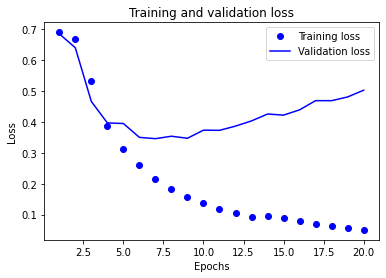

In [40]:
import matplotlib.pyplot as plt

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo"는 "파란색 점"입니다
plt.plot(epochs, loss, 'bo', label='Training loss')
# b는 "파란 실선"입니다
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

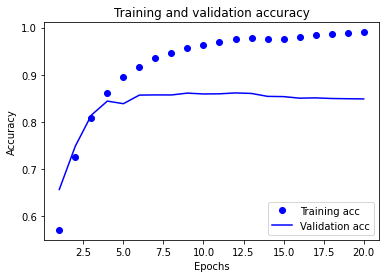

In [41]:
plt.clf()   # 그림을 초기화합니다

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# Word2Vec의 적용

학습한 벡터를 word2vec를 사용하여 확인

In [42]:
embedding_layer = model.layers[0]
weights = embedding_layer.get_weights()[0]
print(weights.shape)    # shape: (vocab_size, embedding_dim)

(10000, 16)


In [43]:
# 학습한 Embedding 파라미터를 파일에 써서 저장합니다. 
word2vec_file_path = os.getenv('HOME')+'/aiffel/sentiment_classification/data/word2vec.txt'
f = open(word2vec_file_path, 'w')
f.write('{} {}\n'.format(vocab_size-4, word_vector_dim))  # 몇개의 벡터를 얼마 사이즈로 기재할지 타이틀을 씁니다.

# 단어 개수(에서 특수문자 4개는 제외하고)만큼의 워드 벡터를 파일에 기록합니다. 
vectors = model.get_weights()[0]
for i in range(4,vocab_size):
    f.write('{} {}\n'.format(index_to_word[i], ' '.join(map(str, list(vectors[i, :])))))
f.close()

In [44]:
from gensim.models.keyedvectors import Word2VecKeyedVectors

word_vectors = Word2VecKeyedVectors.load_word2vec_format(word2vec_file_path, binary=False)
vector = word_vectors['computer']
vector

array([ 0.00498441, -0.02460537,  0.00249849,  0.01831563, -0.0048688 ,
        0.01241422, -0.02006877, -0.03949952, -0.00993096, -0.01947911,
       -0.04645591,  0.04199921, -0.01902743,  0.02462494,  0.01881459,
        0.01503454], dtype=float32)

In [45]:
word_vectors.similar_by_word("love")

[('advance', 0.9555185437202454),
 ('scariest', 0.9484370350837708),
 ('vega', 0.9438527226448059),
 ('article', 0.9415108561515808),
 ('glorious', 0.9414607286453247),
 ('whore', 0.938137412071228),
 ('harsh', 0.9358959794044495),
 ('harriet', 0.934861421585083),
 ('symbols', 0.9345086812973022),
 ('philo', 0.9341310262680054)]

# 사전학습된(Pretrained) 워드 임베딩 모델

ord2Vec 단어 벡터 확인

In [46]:
from gensim.models import KeyedVectors

word2vec_path = os.getenv('HOME')+'/aiffel/sentiment_classification/data/GoogleNews-vectors-negative300.bin.gz'
word2vec = KeyedVectors.load_word2vec_format(word2vec_path, binary=True, limit=1000000)
vector = word2vec['computer']
vector     # 무려 300dim의 워드 벡터입니다.

array([ 1.07421875e-01, -2.01171875e-01,  1.23046875e-01,  2.11914062e-01,
       -9.13085938e-02,  2.16796875e-01, -1.31835938e-01,  8.30078125e-02,
        2.02148438e-01,  4.78515625e-02,  3.66210938e-02, -2.45361328e-02,
        2.39257812e-02, -1.60156250e-01, -2.61230469e-02,  9.71679688e-02,
       -6.34765625e-02,  1.84570312e-01,  1.70898438e-01, -1.63085938e-01,
       -1.09375000e-01,  1.49414062e-01, -4.65393066e-04,  9.61914062e-02,
        1.68945312e-01,  2.60925293e-03,  8.93554688e-02,  6.49414062e-02,
        3.56445312e-02, -6.93359375e-02, -1.46484375e-01, -1.21093750e-01,
       -2.27539062e-01,  2.45361328e-02, -1.24511719e-01, -3.18359375e-01,
       -2.20703125e-01,  1.30859375e-01,  3.66210938e-02, -3.63769531e-02,
       -1.13281250e-01,  1.95312500e-01,  9.76562500e-02,  1.26953125e-01,
        6.59179688e-02,  6.93359375e-02,  1.02539062e-02,  1.75781250e-01,
       -1.68945312e-01,  1.21307373e-03, -2.98828125e-01, -1.15234375e-01,
        5.66406250e-02, -

In [47]:
# 메모리를 다소 많이 소비하는 작업이니 유의해 주세요.
word2vec.similar_by_word("love")

[('loved', 0.6907791495323181),
 ('adore', 0.6816873550415039),
 ('loves', 0.661863386631012),
 ('passion', 0.6100708842277527),
 ('hate', 0.600395679473877),
 ('loving', 0.5886635780334473),
 ('affection', 0.5664337873458862),
 ('undying_love', 0.5547304749488831),
 ('absolutely_adore', 0.5536840558052063),
 ('adores', 0.5440906882286072)]

이전 스텝에서 학습했던 모델의 임베딩 레이어를 Word2Vec의 것으로 교체하여 다시 학습시켜 볼 것입니다.

In [48]:
vocab_size = 10000    # 어휘 사전의 크기입니다(10,000개의 단어)
word_vector_dim = 300  # 워드 벡터의 차원수
embedding_matrix = np.random.rand(vocab_size, word_vector_dim)

# embedding_matrix에 Word2Vec 워드 벡터를 단어 하나씩마다 차례차례 카피한다.
for i in range(4,vocab_size):
    if index_to_word[i] in word2vec:
        embedding_matrix[i] = word2vec[index_to_word[i]]

In [49]:
from tensorflow.keras.initializers import Constant

vocab_size = 10000    # 어휘 사전의 크기입니다(10,000개의 단어)
word_vector_dim = 300  # 워드 벡터의 차원 수 

# 모델 구성
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, 
                                 word_vector_dim, 
                                 embeddings_initializer=Constant(embedding_matrix),  # 카피한 임베딩을 여기서 활용
                                 input_length=maxlen, 
                                 trainable=True))   # trainable을 True로 주면 Fine-tuning
model.add(tf.keras.layers.Conv1D(16, 7, activation='relu'))
model.add(tf.keras.layers.MaxPooling1D(5))
model.add(tf.keras.layers.Conv1D(16, 7, activation='relu'))
model.add(tf.keras.layers.GlobalMaxPooling1D())
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid')) 

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_14 (Embedding)     (None, 580, 300)          3000000   
_________________________________________________________________
conv1d (Conv1D)              (None, 574, 16)           33616     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 114, 16)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 108, 16)           1808      
_________________________________________________________________
global_max_pooling1d (Global (None, 16)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                

In [50]:
# 학습의 진행
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
epochs=20  # 몇 epoch를 훈련하면 좋을지 결과를 보면서 바꾸어 봅시다. 

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=epochs,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Epoch 1/20
30/30 [==============================] - 5s 84ms/step - loss: 0.6929 - accuracy: 0.5275 - val_loss: 0.6878 - val_accuracy: 0.5342
Epoch 2/20
30/30 [==============================] - 2s 67ms/step - loss: 0.6799 - accuracy: 0.5731 - val_loss: 0.6751 - val_accuracy: 0.5895
Epoch 3/20
30/30 [==============================] - 2s 67ms/step - loss: 0.6473 - accuracy: 0.6588 - val_loss: 0.6258 - val_accuracy: 0.6841
Epoch 4/20
30/30 [==============================] - 2s 67ms/step - loss: 0.5347 - accuracy: 0.7668 - val_loss: 0.4514 - val_accuracy: 0.8177
Epoch 5/20
30/30 [==============================] - 2s 66ms/step - loss: 0.3552 - accuracy: 0.8567 - val_loss: 0.3507 - val_accuracy: 0.8509
Epoch 6/20
30/30 [==============================] - 2s 67ms/step - loss: 0.2567 - accuracy: 0.9012 - val_loss: 0.3505 - val_accuracy: 0.8493
Epoch 7/20
30/30 [==============================] - 2s 67ms/step - loss: 0.1994 - accuracy: 0.9275 - val_loss: 0.3510 - val_accuracy: 0.8487
Epoch 8/20
30

In [51]:
# 테스트셋을 통한 모델 평가
results = model.evaluate(x_test,  y_test, verbose=2)

print(results)

782/782 - 2s - loss: 0.5950 - accuracy: 0.8461
[0.5950267910957336, 0.8461199998855591]
